# 02wk-1: Overview (4)

최규빈  
2022-09-15

> 이미지분석, 추천시스템, 텍스트분석 복습 및 비교정리 // GAN intro, GAN
> 실습

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-wLTADeftdizvmko4y_ATAW>

# imports

In [159]:
from fastai.vision.all import * 
from fastai.vision.gan import * 

# fastai를 이용한 분석 steps

`-` 비교

|       |        이미지분석(CNN)        |    추천시스템     |        텍스트분석        |        GAN        |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| 1단계 |       ImageDataLoaders        | CollabDataLoaders |     TextDataLoaders      | DataBlock -\> dls |
| 2단계 |         cnn_learner()         | collab_learner()  | language_model_learner() | GANLearner.wgan() |
| 3단계 |       lrnr.fine_tune(1)       |    lrnr.fit()     |        lrnr.fit()        |    lrnr.fit()     |
| 4단계 | lrnr.predict(), lrnr.model(X) |   lrnr.model(X)   |      lrnr.predict()      |                   |

# 이미지분석, 추천시스템, 텍스트분석의 정리

`-` 데이터는 모두 아래와 같은 느낌이다.

1.  데이터는 $(X,y)$의 형태로 정리되어 있다.

2.  $y$는 우리가 관심이 있는 변수이다. 즉 우리는 $y$를 적절하게 추정하는
    것에 관심이 있다.

3.  $X$는 $y$를 추정하기 위해 필요한 정보이다.

|  $X$ = 설명변수 = 독립변수   | $y$ = 반응변수 = 종속변수  |     비고     |     순서     |           예시           |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
|            이미지            |          카테고리          | 합성곱신경망 |   상관없음   |  개/고양이 이미지 구분   |
|         유저,아이템          |            평점            |  추천시스템  |   상관없음   |    넷플릭스 영화추천     |
|     과거~오늘까지의주가      |          내일주가          |  순환신경망  | 순서상관있음 |         주가예측         |
| 처음 $m$개의 단어(혹은 문장) | 이후 1개의 단어(혹은 문장) |  순환신경망  | 순서상관있음 |     챗봇, 텍스트생성     |
| 처음 $m$개의 단어(혹은 문장) |          카테고리          |  순환신경망  | 순서상관있음 | 영화리뷰 텍스트 감정분류 |

`-` 학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
“규칙” 혹은 “원리”를 찾는 것이다.

-   학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
    “맵핑”을 찾는 것이다.
-   학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
    “힘수”을 찾는 것이다. 즉 $y\approx f(X)$가 되도록 만드는 $f$를 잘
    찾는 것이다. (이 경우 함수를 추정한다라고 표현)
-   학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는 어떠한
    “모델”을 찾는 것이다. 즉 $y\approx model(X)$가 되도록 만드는
    $model$을 잘 찾는 것이다. (이 경우 모형을 학습시킨다라고 표현)
-   **학습이란 주어진 자료 $(X,y)$를 잘 분석하여 $X$에서 $y$로 가는
    어떠한 “네트워크”을 찾는 것이다. 즉 $y\approx net(X)$가 되도록
    만드는 $net$을 잘 찾는 것이다. (이 경우 모형을 네트워크를
    학습시킨다라고 표현)**

`-` prediction이란 학습과정에서 찾은 “규칙” 혹은 “원리”를 $X$에 적용하여
$\hat{y}$을 구하는 과정이다. 학습과정에서 찾은 규칙 혹은 원리는
$f$,$model$,$net$ 으로 생각가능한데 이에 따르면 아래가 성립한다.

-   $\hat{y} = f(X)$
-   $\hat{y} = model(X)$
-   $\hat{y} = net(X)$

***자잘한개념***

`-` $\hat{y}$는 $X$가 주어진 자료에 있는 값인지 아니면 새로운 값 인지에
따라 지칭하는 이름이 미묘하게 다르다.

1.  $X \in data$: $\hat{y}=net(X)$ 는 predicted value, fitted value 라고
    부른다.

2.  $X \notin data$: $\hat{y}=net(X)$ 는 predicted value, predicted
    value with new data 라고 부른다.

`-` 경우1은 “$loss$ = $y$ 와 $\hat{y}$ 의 차이” 를 정의할 수 있으나
경우2는 그렇지 않다.

# GAN intro

`-` 저자: 이안굿펠로우

-   천재임
-   지도교수가 요수아 벤지오

`-` 논문 NIPS, 저는 이 논문 읽고 소름돋았어요..

-   <https://arxiv.org/abs/1406.2661> (현재시점, 38751회 인용되었음
    $\to$ 48978회 인용..)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤,
2014년 시점..)

`-` 무슨내용? 생성모형

## 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자)

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와
고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고
볼수 있는가?

`-` 진정으로 인공지능이 이미지를 이해했다면, 이미지를 만들수도 있어야
한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg)

## GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면?

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면?

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소)

`-` 게임영상 (파이널판타지)

`-` 거북이의 커버..

`-` 너무 많아요…..

## 생성모형이란? 통계학과 버전의 설명

> 제한된 정보만으로 어떤 문제를 풀 때, 그 과정에서 원래의 문제보다
> 일반적인 문제를 풀지 말고, 가능한 원래의 문제를 직접 풀어야한다.
> 배프닉 (SVM 창시자)

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자.

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다.
여기에서 $p(\boldsymbol{x},y)$는 ${\boldsymbol x},y$의 결합확률밀도함수.

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이
있다. 여기에서 $p(y|\boldsymbol{x})$는 조건부 확률밀도 함수

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률
$p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은
불가능

$$p(y|{\boldsymbol x}) = \frac{p({\boldsymbol x},y)}{p({\boldsymbol x})} = \frac{p({\boldsymbol x},y)}{\sum_{y}p({\boldsymbol x},y)} $$

-   즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능

`-` 따라서 배프닉의 원리에 의하면 식별적 분류가 생성적 분류보다 바람직한
접근법이라 할 수 있음.

`-` 하지만 다양한 현실문제에서 생성모형이 유용할때가 많다.

## GAN의 원리

`-` GAN은 생성모형중 하나임

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로
발전하는 모형으로 설명할 수 있다.

> The generative model can be thought of as analogous to a team of
> counterfeiters, trying to produce fake currency and use it without
> detection, while the discriminative model is analogous to the police,
> trying to detect the counterfeit currency. Competition in this game
> drives both teams to improve their methods until the counterfeits are
> indistiguishable from the genuine articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜
가짜이미지를 만든다(generate)

`-` 무식한 상황극..

-   위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림)
-   경찰: (위조범이 만든 돈을 보고) 이건 가짜다!
-   위조범: 걸렸군.. 더 정교하게 만들어야지..
-   경찰: 이건 진짠가?… –\> 상사에게 혼남. 그것도 구분못하냐고
-   위조범: 더 정교하게 만들자..
-   경찰: 더 판별능력을 업그레이드 하자!
-   반복..

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜
이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만
가짜라고 말할때) 학습을 멈춘다.

## 아키텍처

`-` 아래와 같은 두 모델(네트워크)를 생각하자.

-   위조범네트워크: X=노이즈(=아무숫자) $\to$ y=지폐이미지(=가짜지폐)
-   경찰네트워크: X={가짜지폐,진짜지폐} $\to$ y={진짜,가짜}

`-` 전체 알고리즘은 아래와 같은 순서로 돌아간다. (전체 이미지 자료는
$n$개라고 하자)

1.  적당한 크기의 $n$개의 노이즈가 위조범네트워크에 입력으로 들어감

2.  위조범네트워크는 적당한 크기의 $n$개의 노이즈를 입력으로 받고
    출력으로 $n$개의 이미지를 뱉어냄.

3.  위조범이 뱉어낸 이미지와 진짜이미지를 합쳐 $2n$개의 자료를 만들고
    이를 경창네트워크의 입력으로 넣음.

4.  경찰네트워크는 $2n$개의 자료를 입력으로 받아서 $2n$개의 예측결과를
    제공.

# GAN 실습

## 1단계

In [139]:
path = untar_data(URLs.MNIST_SAMPLE)

In [140]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

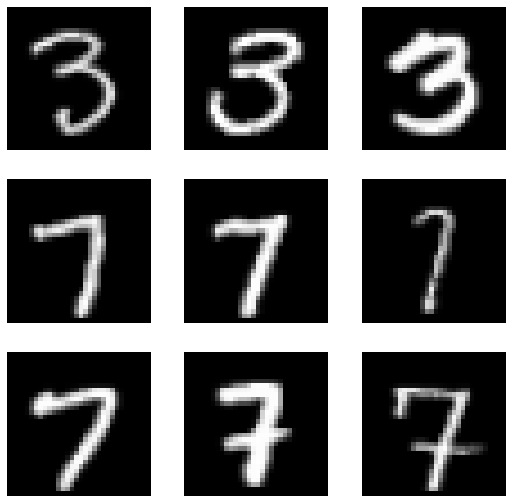

In [141]:
dls.show_batch()

## 2단계

In [142]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1) # 32*32의 이미지가 칼라이미지로 출력. 
police = basic_critic(32,n_channels=3,n_extra_layers=1) # 32*32의 칼라이미지가 입력으로 들어옴. 

In [143]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

## 3단계

`-` lrnr.fit(10) 진행

In [144]:
lrnr.fit(10)

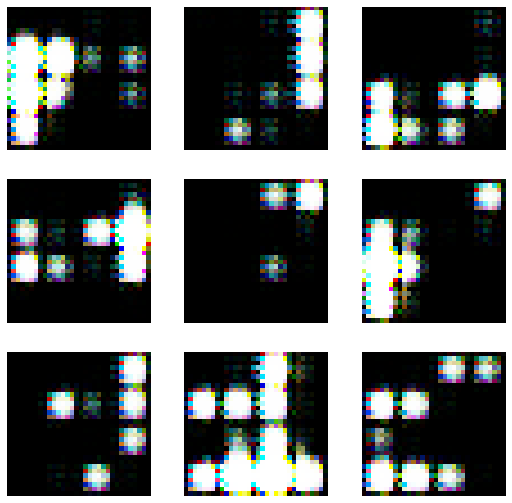

In [145]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총20회

In [146]:
lrnr.fit(10)

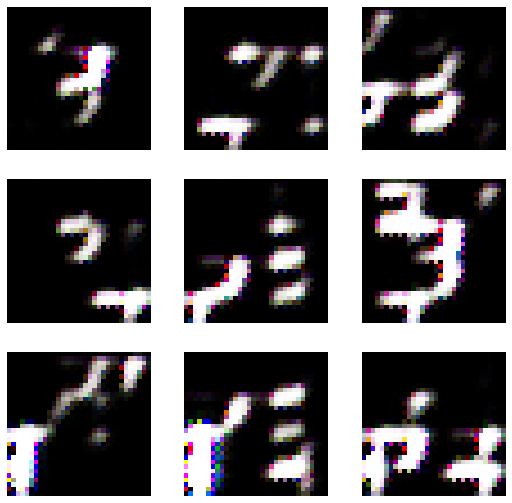

In [147]:
lrnr.show_results()

`-` lrnr.fit(30) 추가로 진행 // 총50회

In [148]:
lrnr.fit(30)

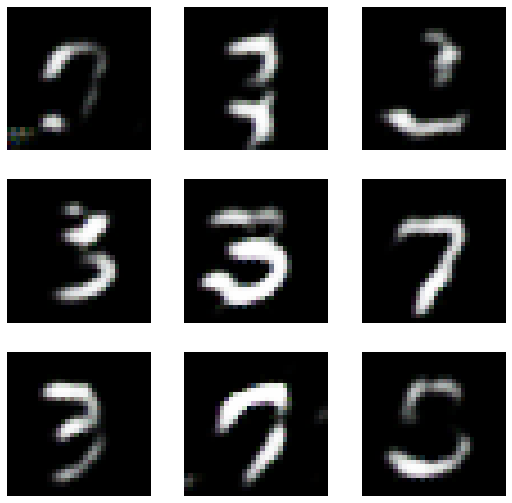

In [154]:
lrnr.show_results()

-   그럴싸한 글씨가 몇개 보이긴 함

## 4단계 (없음)